In [12]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#import csv dataset
df =pd.read_csv("dataset/TWO_CENTURIES_OF_UM_RACES.csv")

C:\Users\user\AppData\Local\Temp\ipykernel_16120\2838509812.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df =pd.read_csv("dataset/TWO_CENTURIES_OF_UM_RACES.csv")


In [14]:
#checking import
df.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7461195 entries, 0 to 7461194
Data columns (total 13 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Year of event              7461195 non-null  int64  
 1   Event dates                7461195 non-null  object 
 2   Event name                 7461195 non-null  object 
 3   Event distance/length      7461195 non-null  object 
 4   Event number of finishers  7461195 non-null  int64  
 5   Athlete performance        7461193 non-null  object 
 6   Athlete club               4634822 non-null  object 
 7   Athlete country            7461192 non-null  object 
 8   Athlete year of birth      6873034 non-null  float64
 9   Athlete gender             7461188 non-null  object 
 10  Athlete age category       6876257 non-null  object 
 11  Athlete average speed      7460971 non-null  object 
 12  Athlete ID                 7461195 non-null  int64  
dtypes: float64(1

In [15]:
#checking dataset
df.head(10)

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID
0,2018,06.01.2018,Selva Costera (CHI),50km,22,4:51:39 h,Tnfrc,CHI,1978.0,M,M35,10.286,0
1,2018,06.01.2018,Selva Costera (CHI),50km,22,5:15:45 h,Roberto Echeverría,CHI,1981.0,M,M35,9.501,1
2,2018,06.01.2018,Selva Costera (CHI),50km,22,5:16:44 h,Puro Trail Osorno,CHI,1987.0,M,M23,9.472,2
3,2018,06.01.2018,Selva Costera (CHI),50km,22,5:34:13 h,Columbia,ARG,1976.0,M,M40,8.976,3
4,2018,06.01.2018,Selva Costera (CHI),50km,22,5:54:14 h,Baguales Trail,CHI,1992.0,M,M23,8.469,4
5,2018,06.01.2018,Selva Costera (CHI),50km,22,6:25:01 h,NaN,ARG,1974.0,M,M40,7.792,5
6,2018,06.01.2018,Selva Costera (CHI),50km,22,6:28:00 h,Los Patagones,ARG,1979.0,F,W35,7.732,6
7,2018,06.01.2018,Selva Costera (CHI),50km,22,6:32:24 h,Reaktiva Chile,CHI,1967.0,F,W50,7.645,7
8,2018,06.01.2018,Selva Costera (CHI),50km,22,6:39:08 h,Puro Trail Osorno,CHI,1985.0,M,M23,7.516,8
9,2018,06.01.2018,Selva Costera (CHI),50km,22,6:45:11 h,Marlene Flores Team,CHI,1976.0,M,M40,7.404,9


In [16]:
df['Event dates']

0          06.01.2018
1          06.01.2018
2          06.01.2018
3          06.01.2018
4          06.01.2018
              ...    
7461190    00.00.1995
7461191    00.00.1995
7461192    00.00.1995
7461193    00.00.1995
7461194    00.00.1995
Name: Event dates, Length: 7461195, dtype: object

In [17]:
# splitting country code from Event name column
df["Event name"].str.split('(').str.get(1).str.split(')').str.get(0)

0          CHI
1          CHI
2          CHI
3          CHI
4          CHI
          ... 
7461190    FRA
7461191    FRA
7461192    HUN
7461193    HUN
7461194    HUN
Name: Event name, Length: 7461195, dtype: object

In [18]:
# Extract numbers and units into separate columns
df[['Event_distance','unit']] = df['Event distance/length'].str.extract(r'(\d+\.\d*|\d+)(\D*)')


In [19]:
# Pattern to match (similar to SQL LIKE '%apple%')
pattern = 'IND'

In [20]:
#When na=False, rows with NaN values in the specified column will not be included in the filtered result.
#When na=True, rows with NaN values in the specified column will be included in the filtered result.
#When na=None, the NaN values will be left as NaN in the output, and they will not affect the filtering process.
df[df['Athlete country'].str.contains(pattern, na=False)]


,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event_distance,unit
5829,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:37:30 h,NaN,IND,NaN,M,NaN,5.797,5197,50,km
5843,2018,18.03.2018,TITI 50km Road Ultra Marathon (MAS),50km,282,8:44:07 h,NaN,IND,1977.0,M,M40,5.724,5211,50,km
10779,2018,17.03.2018,EcoTrail de Paris - Ile de France 45 km (FRA),45km,1393,6:09:40 h,*Heidelberg,IND,1990.0,M,M23,7.304,10112,45,km
16245,2018,17.03.2018,Om Die Dam 50km (RSA),50km,2491,5:18:55 h,Brackenfell Athletics ...,IND,1988.0,M,M23,9.407,15497,50,km
18624,2018,17.03.2018,Dalat Ultra Trail (VIE),70km,135,9:21:59 h,NaN,IND,1986.0,M,M23,7.474,17865,70,km
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7110133,1987,16.-17.11.1987,Six-Days-Colac - 24h Split (AUS),24h,16,133.200 km,NaN,IND,1959.0,M,M23,5550.0,1598983,24,h
7220116,1990,13.-19.10.1990,Six Day Track Race Gateshead (GBR),6d,13,516.220 km,NaN,IND,1959.0,M,M23,3585.0,1598983,6,d
7449348,1995,29.04.1995,IAAF World Race Walking Cup - 50km (CHN),50km,85,5:04:33 h,NaN,IND,NaN,M,NaN,9851.0,1640502,50,km
7449349,1995,29.04.1995,IAAF World Race Walking Cup - 50km (CHN),50km,85,5:04:33 h,NaN,IND,NaN,M,NaN,9851.0,1640503,50,km


In [21]:
# only USA data, 50 km or 50 mi distance, from 2020 year
df2=df[(df['Event distance/length'].isin(['50km','50mi'])) & (df['Year of event']==2020) & (df["Event name"].str.split('(').str.get(1).str.split(')').str.get(0)=='USA')]

In [22]:
df2.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event_distance,unit
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,50,km
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,50,km
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,50,km
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,50,km
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition (USA),50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,50,km


In [23]:
df2.shape

(26090, 15)

In [24]:
#remove USA from event name
df2.loc[:, 'Event name'] =df2["Event name"].str.split('(').str.get(0)

C:\Users\user\AppData\Local\Temp\ipykernel_16120\4033875313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.loc[:, 'Event name'] =df2["Event name"].str.split('(').str.get(0)


In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26090 entries, 2539945 to 2760961
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year of event              26090 non-null  int64  
 1   Event dates                26090 non-null  object 
 2   Event name                 26090 non-null  object 
 3   Event distance/length      26090 non-null  object 
 4   Event number of finishers  26090 non-null  int64  
 5   Athlete performance        26090 non-null  object 
 6   Athlete club               22971 non-null  object 
 7   Athlete country            26090 non-null  object 
 8   Athlete year of birth      25857 non-null  float64
 9   Athlete gender             26090 non-null  object 
 10  Athlete age category       25873 non-null  object 
 11  Athlete average speed      26090 non-null  object 
 12  Athlete ID                 26090 non-null  int64  
 13  Event_distance             26090 non-n

In [26]:
# checking null count
nan_count = df2['Athlete year of birth'].isna().sum()
nan_count

233

In [27]:
#drop NaN values from Athlete year of birth and storing in new dataframe df3

# axis specifies the direction to apply the dropna method. When axis=1, it means columns are being targeted. If it were axis=0, it would target rows instead.
# how specifies the condition for dropping. The value 'all' means that the column will be dropped only if all of its values are NaN. If the value was 'any', it would drop the column if any of its values were NaN
df3 = df2.dropna(subset=['Athlete year of birth'])

In [28]:
#converting datatype to integer
df3["Athlete year of birth"].astype(int)

2539945    1991
2539946    1981
2539947    1999
2539948    1983
2539949    1977
           ... 
2760957    1958
2760958    1977
2760959    1962
2760960    1981
2760961    1980
Name: Athlete year of birth, Length: 25857, dtype: int32

In [29]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25857 entries, 2539945 to 2760961
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Year of event              25857 non-null  int64  
 1   Event dates                25857 non-null  object 
 2   Event name                 25857 non-null  object 
 3   Event distance/length      25857 non-null  object 
 4   Event number of finishers  25857 non-null  int64  
 5   Athlete performance        25857 non-null  object 
 6   Athlete club               22834 non-null  object 
 7   Athlete country            25857 non-null  object 
 8   Athlete year of birth      25857 non-null  float64
 9   Athlete gender             25857 non-null  object 
 10  Athlete age category       25857 non-null  object 
 11  Athlete average speed      25857 non-null  object 
 12  Athlete ID                 25857 non-null  int64  
 13  Event_distance             25857 non-n

In [30]:
# new column for athlete age
df3["athlete_age"]=2020-df3["Athlete year of birth"].astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_16120\1259275122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["athlete_age"]=2020-df3["Athlete year of birth"].astype(int)


In [31]:
#athlete age cleaned
df3

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event_distance,unit,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55 h,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,50,km,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32 h,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,50,km,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57 h,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,50,km,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02 h,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,50,km,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34 h,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,50,km,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48 h,"*East Lansing, MI",USA,1958.0,F,W60,7.013,816361,50,km,62
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22 h,"*Traverse City, MI",USA,1977.0,F,W40,6.706,326469,50,km,43
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24 h,"*Traverse City, MI",USA,1962.0,F,W55,6.705,372174,50,km,58
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30 h,"*Mason, MI",USA,1981.0,F,W35,6.543,860349,50,km,39


In [32]:
# remove h from Athlete performance

df3.loc[:, 'Athlete performance'] =df3["Athlete performance"].str.split(' ').str.get(0)

C:\Users\user\AppData\Local\Temp\ipykernel_16120\3309968512.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3.loc[:, 'Athlete performance'] =df3["Athlete performance"].str.split(' ').str.get(0)


In [33]:
df3.head()

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete club,Athlete country,Athlete year of birth,Athlete gender,Athlete age category,Athlete average speed,Athlete ID,Event_distance,unit,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,"*Normandy Park, WA",USA,1991.0,M,M23,15.158,71287,50,km,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,"*Gold Bar, WA",USA,1981.0,M,M35,12.369,629508,50,km,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,"*Vashon, WA",USA,1999.0,M,MU23,12.099,64838,50,km,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,"*Gig Harbor, WA",USA,1983.0,M,M35,11.449,704450,50,km,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,"*Bainbridge Island, WA",USA,1977.0,M,M40,11.212,810281,50,km,43


In [34]:
# drop columns Athlete club, Athlete country, Athlete year of birth, Athlete age category
df3=df3.drop(columns=['Athlete club','Athlete country','Athlete year of birth','Athlete age category'])

In [35]:
df3

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Event_distance,unit,athlete_age
2539945,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,50,km,29
2539946,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,50,km,39
2539947,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,50,km,21
2539948,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,50,km,37
2539949,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,50,km,43
...,...,...,...,...,...,...,...,...,...,...,...,...
2760957,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,50,km,62
2760958,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,50,km,43
2760959,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,50,km,58
2760960,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,50,km,39


In [36]:
#checking null values
df3.isna().sum()

Year of event                0
Event dates                  0
Event name                   0
Event distance/length        0
Event number of finishers    0
Athlete performance          0
Athlete gender               0
Athlete average speed        0
Athlete ID                   0
Event_distance               0
unit                         0
athlete_age                  0
dtype: int64

In [37]:
#check for duplicates
df3[df3.duplicated()==True]

,Year of event,Event dates,Event name,Event distance/length,Event number of finishers,Athlete performance,Athlete gender,Athlete average speed,Athlete ID,Event_distance,unit,athlete_age


In [38]:
#reset index
df3=df3.reset_index(drop=True)

In [39]:
#checking datatypes
df3.dtypes

Year of event                 int64
Event dates                  object
Event name                   object
Event distance/length        object
Event number of finishers     int64
Athlete performance          object
Athlete gender               object
Athlete average speed        object
Athlete ID                    int64
Event_distance               object
unit                         object
athlete_age                   int32
dtype: object

In [40]:
df3["Athlete average speed"]=df3["Athlete average speed"].astype(float)

In [41]:
df3.dtypes

Year of event                  int64
Event dates                   object
Event name                    object
Event distance/length         object
Event number of finishers      int64
Athlete performance           object
Athlete gender                object
Athlete average speed        float64
Athlete ID                     int64
Event_distance                object
unit                          object
athlete_age                    int32
dtype: object

In [42]:
# rename columns

df3=df3.rename(columns={'Year of event':'year' ,
                                              'Event dates':'date',
                                              'Event name':'event',
                                              'Event distance/length':'distance',
                                              'Event number of finishers':'no_of_finishers',
                                              'Athlete performance':'athlete_performance',
                                              'Athlete gender':'gender',
                                              'Athlete average speed':'average_speed',
                                              'Athlete ID':'athlete_id'                                                                                                                                                                                         
                                              })

In [43]:
df3

,year,date,event,distance,no_of_finishers,athlete_performance,gender,average_speed,athlete_id,Event_distance,unit,athlete_age
0,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,3:17:55,M,15.158,71287,50,km,29
1,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:02:32,M,12.369,629508,50,km,39
2,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:07:57,M,12.099,64838,50,km,21
3,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:22:02,M,11.449,704450,50,km,37
4,2020,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,4:27:34,M,11.212,810281,50,km,43
...,...,...,...,...,...,...,...,...,...,...,...,...
25852,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:07:48,F,7.013,816361,50,km,62
25853,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:22,F,6.706,326469,50,km,43
25854,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:27:24,F,6.705,372174,50,km,58
25855,2020,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,7:38:30,F,6.543,860349,50,km,39


In [44]:
#reorder columns
df4=df3[['date','event','distance','no_of_finishers','athlete_id','gender','athlete_age','athlete_performance','average_speed']]

In [45]:
#removed year column as redundant
df4

,date,event,distance,no_of_finishers,athlete_id,gender,athlete_age,athlete_performance,average_speed
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212
...,...,...,...,...,...,...,...,...,...
25852,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,816361,F,62,7:07:48,7.013
25853,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,326469,F,43,7:27:22,6.706
25854,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,372174,F,58,7:27:24,6.705
25855,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,860349,F,39,7:38:30,6.543


In [46]:
#remove trailing space
df4.loc[:,'event'] = df4['event'].str.rstrip()

C:\Users\user\AppData\Local\Temp\ipykernel_16120\1106404524.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.loc[:,'event'] = df4['event'].str.rstrip()


In [47]:
df4

,date,event,distance,no_of_finishers,athlete_id,gender,athlete_age,athlete_performance,average_speed
0,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,71287,M,29,3:17:55,15.158
1,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,629508,M,39,4:02:32,12.369
2,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,64838,M,21,4:07:57,12.099
3,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,704450,M,37,4:22:02,11.449
4,02.02.2020,West Seattle Beach Run - Winter Edition,50km,20,810281,M,43,4:27:34,11.212
...,...,...,...,...,...,...,...,...,...
25852,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,816361,F,62,7:07:48,7.013
25853,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,326469,F,43,7:27:22,6.706
25854,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,372174,F,58,7:27:24,6.705
25855,03.10.2020,Yankee Springs Fall Trail Run Festival,50km,30,860349,F,39,7:38:30,6.543


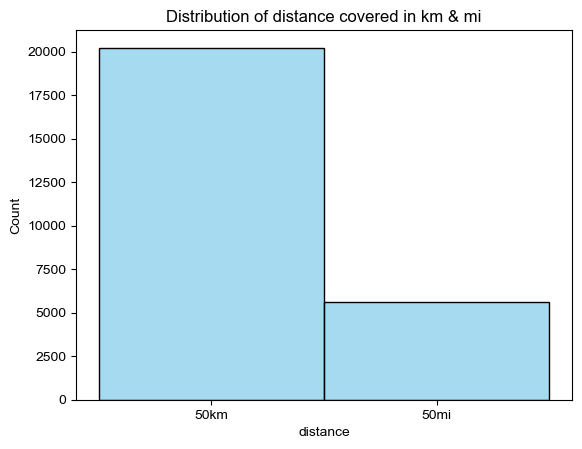

In [48]:
#visualisation
sns.histplot(df4["distance"], color="skyblue")
plt.title("Distribution of distance covered in km & mi")
sns.set_style("dark") 

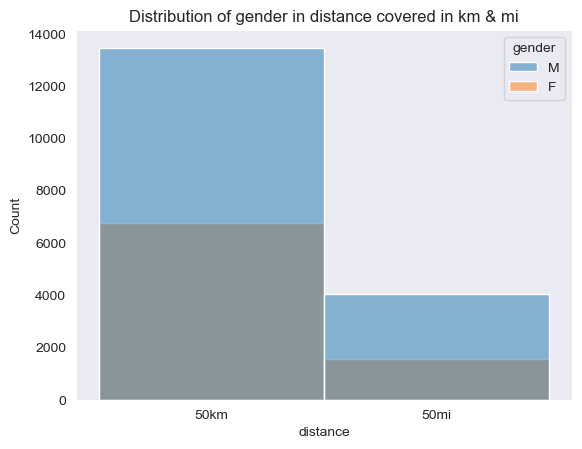

In [49]:
sns.histplot(df4, x="distance", hue="gender")
plt.title("Distribution of gender in distance covered in km & mi")
sns.set_style("dark") 

Text(0.5, 1.0, 'Gender wise Athlete average speed for 50 mi')

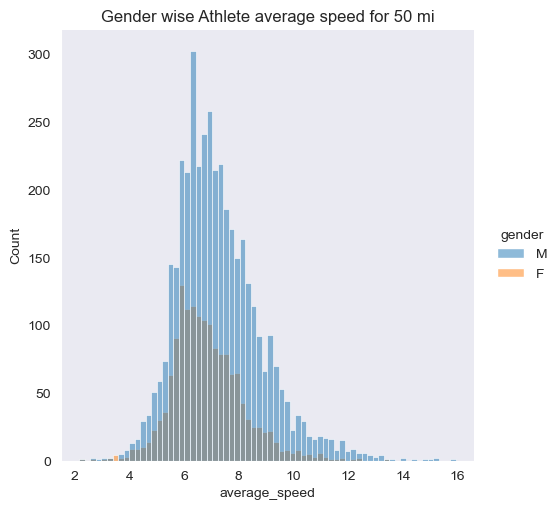

In [50]:
sns.displot(df3,x=df3[df3['distance']=='50mi']['average_speed'], hue="gender")
plt.title('Gender wise Athlete average speed for 50 mi')

Text(0.5, 1.0, 'Gender wise Athlete average speed')

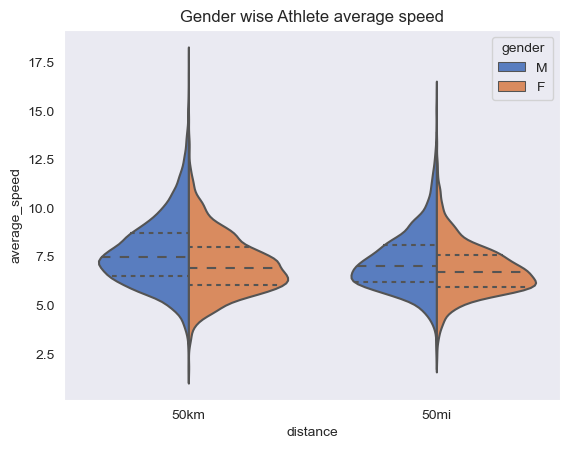

In [51]:
sns.violinplot(data=df3,x='distance',y='average_speed', hue="gender", split=True, inner='quart', palette="muted")
plt.title('Gender wise Athlete average speed')

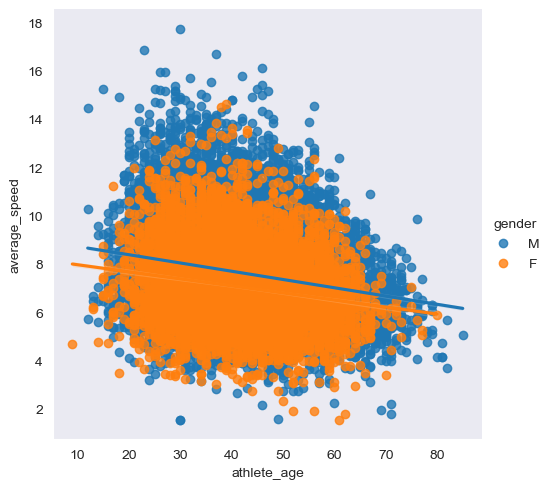

In [52]:
sns.lmplot(data=df3,x='athlete_age',y='average_speed', hue="gender")

In [53]:
# difference in speed by gender
df4.groupby(['distance','gender'])['average_speed'].median()

distance  gender
50km      F         6.900
          M         7.503
50mi      F         6.695
          M         7.011
Name: average_speed, dtype: float64

In [65]:
#what age groups are the best in the 50 mi race
df4[df4['distance']=="50mi"].groupby('athlete_age')['average_speed'].agg(['mean','count']).sort_values('mean',ascending=False).query('count>19').head(15)


,mean,count
athlete_age,,
29,7.902252,135
23,7.779800,55
28,7.575252,107
30,7.569204,157
25,7.540923,91
31,7.451638,138
38,7.430022,231
35,7.422359,195
36,7.403854,185


In [114]:
#what age groups are the worst in the 50 mi race
df_worst_athlete_age=df4[df4['distance']=="50mi"].groupby('athlete_age')['average_speed'].agg(['mean','count']).sort_values('mean',ascending=True).query('count>9').head(10)


In [115]:
df_worst_athlete_age.reset_index(inplace=True)

In [116]:
df_worst_athlete_age

,athlete_age,mean,count
0,70,5.470667,12
1,65,5.934786,14
2,68,5.957500,10
3,67,6.114909,11
4,66,6.194300,10
5,60,6.261788,33
6,62,6.272730,37
7,61,6.358355,31
8,63,6.514806,31
9,58,6.582328,67


Text(0.5, 1.0, 'Age Distribution')

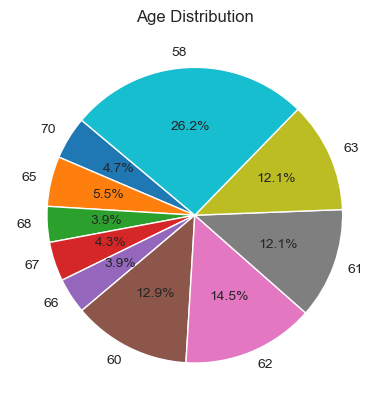

In [119]:
plt.pie(df_worst_athlete_age['count'], labels=df_worst_athlete_age['athlete_age'], autopct='%1.1f%%', startangle=140)
plt.title('Age Distribution')

In [72]:
#seasons for data
df4['month']=df4['date'].str.split('.').str.get(1).astype(int)

C:\Users\user\AppData\Local\Temp\ipykernel_16120\4254032973.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['month']=df4['date'].str.split('.').str.get(1).astype(int)


In [75]:
df4['season']=df4['month'].apply(lambda x: 'Winter' if x>11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')

C:\Users\user\AppData\Local\Temp\ipykernel_16120\98296417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['season']=df4['month'].apply(lambda x: 'Winter' if x>11 else 'Fall' if x > 8 else 'Summer' if x > 5 else 'Spring' if x > 2 else 'Winter')


In [79]:
df4.groupby('season')['average_speed'].agg(['mean','count']).sort_values('mean', ascending=False)

,mean,count
season,,
Spring,7.684430,3294
Winter,7.518187,11595
Fall,7.406619,8315
Summer,6.869336,2653


In [89]:
#50 mi 
df_season=df4[df4['distance']=="50mi"].groupby('season')['average_speed'].agg(['mean','count']).sort_values('mean', ascending=False)

In [99]:
df_season.reset_index(inplace=True)

Text(0, 0.5, 'Mean of Runners')

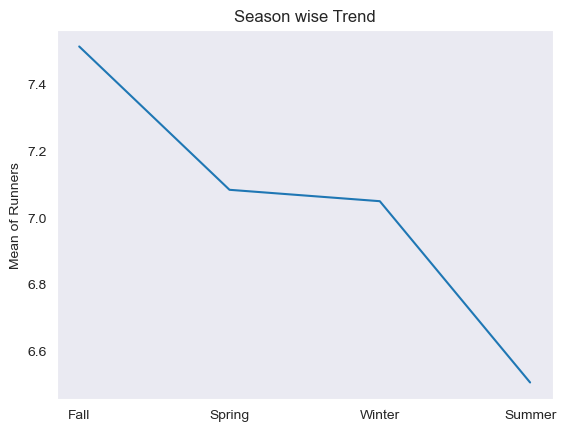

In [108]:
plt.plot(df_season['season'], df_season['mean'])
plt.title('Season wise Trend')
plt.ylabel('Mean of Runners')

Text(0.5, 1.0, 'Season wise Trend')

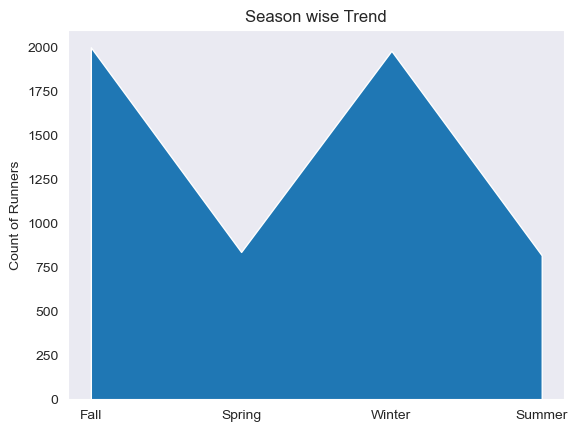

In [107]:

plt.stackplot(df_season['season'], df_season['count'])
plt.ylabel('Count of Runners')
plt.title('Season wise Trend')

Its a lot more difficult to run a long distance marathon during the hotter months. 